### Libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import numpy as np
import pandas as pd

from matplotlib import cm
from matplotlib import colors
from scipy import interpolate

import random
from PIL import Image 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score
from sklearn import metrics


from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from xgboost import XGBClassifier

import os
from tqdm import tnrange, tqdm_notebook

### Get  & Transform features

In [4]:
def get_features(reshape = False, folders_chosen = None, n = 300, path = 'top'):
    features = []
    labels = []
    folders_chosen = os.listdir(path)
    for folder in tqdm_notebook(folders_chosen, desc = 'Folders'):
        fold = os.path.join(path,folder)
        print(fold)
        if np.array(os.listdir(fold))[-1] == 'Thumbs.db':
            files = os.listdir(fold)[:-1]
        else:
            files = os.listdir(fold)
        print(len(files))
        images = [i for i in random.sample(files, n)]
        for image in images: 
            labels.append(folder)
            image_file = Image.open(os.path.join(fold,image)) # open colour image
            real_shape = np.array(image_file).shape
            if reshape:
                image_file= image_file.convert('L')
            features.append(np.ravel(image_file))
    return features, labels, real_shape

In [20]:
path = 'top'
path2 = 'thumbnails_features_deduped_publish'
folders_chosen = os.listdir(path)
n=0
for folder in tqdm_notebook(folders_chosen, desc = 'Folders'):
        print(folder)
        fold = os.path.join(path,folder)        
        if np.array(os.listdir(fold))[-1] == 'Thumbs.db':
            files = os.listdir(fold)[:-1]
        else:
            files = os.listdir(fold)
        files = [f.split('.')[0] for f in files]
      #  print(files[:10])
        fold2 = os.path.join(path2,folder)
        if np.array(os.listdir(fold2))[-1] == 'Thumbs.db':
            files2 = os.listdir(fold2)[:-1]
        else:
            files2 = os.listdir(fold2)
        files2 = [f.split('.')[0] for f in files2]
        if len(files) != len(files2):
         #   print('nono')
            print(list(set(files2).difference(files)))
            n += len(list(set(files2).difference(files)))
print(n-17*3)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


amy winehouse
['feature', 'info', 'filelist_LBP']
angelina jolie
['info', 'filelist_LBP', '5921', '5625', '1282', '3240', '5110', 'feature', '5977', '3920', '5209']
anne hathaway
['feature', 'info', 'filelist_LBP']
avril lavigne
['info', '3266', '1989', '3754', '301', '3836', 'feature', '3561', '3294', 'filelist_LBP', '4093', '445', '2759', '1435', '3824', '2362', '3331']
barack obama
['4320', '1980', 'info', '2732', '2325', '3806', '4264', 'feature', '333', '3842', '1110', '5153', '4332', 'filelist_LBP', '3972', '781', '4990', '2095']
beyonce knowles
['info', '1382', '1463', 'filelist_LBP', '709', 'feature', '1602']
brad pitt
['info', 'filelist_LBP', '1201', '1222', '376', '1647', 'feature', '263', '1417']
britney spears
['1542', '4949', '3189', '6336', '5119', '5043', '4352', '6054', 'feature', '6822', '4226', '1774', '6619', 'filelist_LBP', '4495', '5448', '5661', '5299', '7015', '2820', '6890', '5941', '4903', '7412', '6248', '2327', '4813', 'info', '2469', '7354', '4404', '6179', 

In [5]:
images, labels, shape = get_features()

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


top\amy winehouse
624
top\angelina jolie
1975
top\anne hathaway
543
top\avril lavigne
1268
top\barack obama
2066
top\beyonce knowles
712
top\brad pitt
796
top\britney spears
2930
top\christina aguilera
1232
top\hilary duff
1206
top\jennifer lopez
1193
top\jessica alba
1578
top\jessica simpson
1180
top\johnny depp
1058
top\keira knightley
1034
top\lindsay lohan
1865
top\paris hilton
1849



In [6]:
images[1].shape

(99372,)

In [7]:
labels_uni = np.unique(labels)
di_y = dict(zip(labels_uni, range(len(labels_uni)))) 
y = [di_y[label] for label in labels]

### PCA

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images,y, test_size=0.25, random_state=42)
n_components = 100
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

#eigenfaces = pca.components_.reshape((n_components, shape[0], shape[1], shape[2]))

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

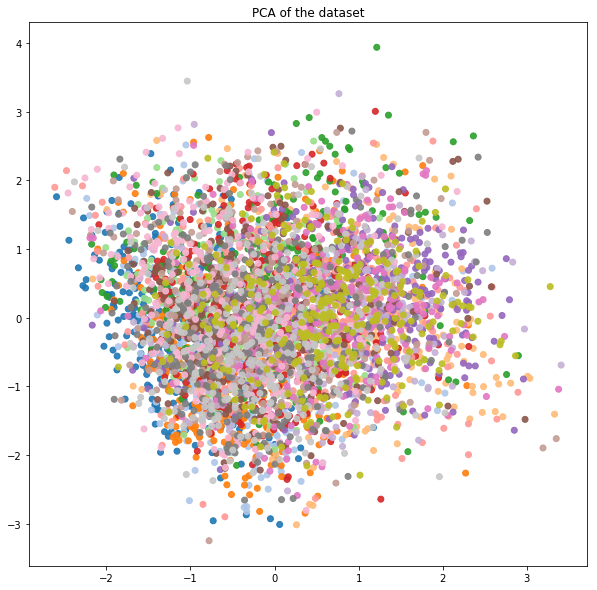

In [9]:
xy = pca.transform(images)
colors = [cm.Vega20(c) for c in np.array(y)] 
plt.figure(figsize = (10, 10))
plt.scatter(xy[:,0], xy[:,1], color = colors, alpha = 0.9)
plt.title('PCA of the dataset')
plt.show()

### Predictions

#### SVC

In [11]:
clf = SVC(C=3, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
clf = clf.fit(X_train_pca, y_train)

In [147]:
y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred, target_names=np.unique(labels)))
print(confusion_matrix(y_test, y_pred, labels=range(len(np.unique(labels)))))

print(metrics.accuracy_score(y_test, y_pred))

                    precision    recall  f1-score   support

     amy winehouse       0.45      0.65      0.53        63
    angelina jolie       0.17      0.13      0.15        54
     anne hathaway       0.29      0.31      0.30        62
     avril lavigne       0.26      0.21      0.23        47
      barack obama       0.33      0.54      0.41        48
   beyonce knowles       0.19      0.25      0.22        57
         brad pitt       0.19      0.19      0.19        36
    britney spears       0.08      0.09      0.08        47
christina aguilera       0.61      0.50      0.55        50
       hilary duff       0.11      0.10      0.10        50
    jennifer lopez       0.17      0.15      0.16        47
      jessica alba       0.05      0.02      0.03        49
   jessica simpson       0.30      0.25      0.27        52
       johnny depp       0.22      0.26      0.24        42
   keira knightley       0.17      0.15      0.16        47
     lindsay lohan       0.03      0.02

In [12]:
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

clf1 = OutputCodeClassifier(clf, code_size=2, random_state=0)
y_pred = clf1.fit(X_train_pca, y_train).predict(X_test_pca)
print(metrics.accuracy_score(y_test, y_pred))

clf2 = OneVsOneClassifier(clf)
y_pred = clf2.fit(X_train_pca, y_train).predict(X_test_pca)
print(metrics.accuracy_score(y_test, y_pred))

clf2 = OneVsRestClassifier(clf)
y_pred = clf2.fit(X_train_pca, y_train).predict(X_test_pca)
print(metrics.accuracy_score(y_test, y_pred))

0.0682352941176
0.0713725490196
0.149803921569


#### RandomForest

In [8]:
parametres = {"n_jobs":np.array([1,2,3,4]), 'verbose':np.linspace(0,50)}
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)
grid = GridSearchCV(RandomForestClassifier(), param_grid=parametres, cv=cv, verbose = 10)
grid.fit(X_train_pca, y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
with open('parametrs.txt', 'w') as out:
     out.write(str(grid.best_params_) + '\n' + str(grid.best_score_))
        
best_model = grid.best_estimator_

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] verbose=0.0, n_jobs=1 ...........................................
[CV] ............ verbose=0.0, n_jobs=1, score=0.132026, total=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] verbose=0.0, n_jobs=1 ...........................................
[CV] ............ verbose=0.0, n_jobs=1, score=0.155556, total=   0.1s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] verbose=0.0, n_jobs=1 ...........................................
[CV] ............ verbose=0.0, n_jobs=1, score=0.121569, total=   0.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


[CV] verbose=1.02040816327, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=1.02040816327, n_jobs=1, score=0.130719, total=   0.2s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s


[CV] verbose=1.02040816327, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=1.02040816327, n_jobs=1, score=0.129412, total=   0.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s remaining:    0.0s


[CV] verbose=1.02040816327, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=1.02040816327, n_jobs=1, score=0.130719, total=   0.2s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.5s remaining:    0.0s


[CV] verbose=2.04081632653, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=2.04081632653, n_jobs=1, score=0.112418, total=   0.2s


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.9s remaining:    0.0s


[CV] verbose=2.04081632653, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=2.04081632653, n_jobs=1, score=0.154248, total=   0.3s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.3s remaining:    0.0s


[CV] verbose=2.04081632653, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=2.04081632653, n_jobs=1, score=0.156863, total=   0.1s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.5s remaining:    0.0s


[CV] verbose=3.0612244898, n_jobs=1 ..................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] ... verbose=3.0612244898, n_jobs=1, score=0.132026, total=   0.1s
[CV] verbose=3.0612244898, n_jobs=1 ..................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] ... verbose=3.0612244898, n_jobs=1, score=0.120261, total=   0.1s
[CV] verbose=3.0612244898, n_jobs=1 ..................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] ... verbose=3.0612244898, n_jobs=1, score=0.152941, total=   0.1s
[CV] verbose=4.08163265306, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=4.08163265306, n_jobs=1, score=0.147712, total=   0.2s
[CV] verbose=4.08163265306, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=4.08163265306, n_jobs=1, score=0.138562, total=   0.2s
[CV] verbose=4.08163265306, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=4.08163265306, n_jobs=1, score=0.151634, total=   0.1s
[CV] verbose=5.10204081633, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s

[CV] .. verbose=5.10204081633, n_jobs=1, score=0.152941, total=   0.1s
[CV] verbose=5.10204081633, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s

[CV] .. verbose=5.10204081633, n_jobs=1, score=0.129412, total=   0.2s
[CV] verbose=5.10204081633, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s

[CV] .. verbose=5.10204081633, n_jobs=1, score=0.159477, total=   0.1s
[CV] verbose=6.12244897959, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s

[CV] .. verbose=6.12244897959, n_jobs=1, score=0.139869, total=   0.2s
[CV] verbose=6.12244897959, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s

[CV] .. verbose=6.12244897959, n_jobs=1, score=0.118954, total=   0.2s
[CV] verbose=6.12244897959, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s

[CV] .. verbose=6.12244897959, n_jobs=1, score=0.126797, total=   0.1s
[CV] verbose=7.14285714286, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s

[CV] .. verbose=7.14285714286, n_jobs=1, score=0.133333, total=   0.2s
[CV] verbose=7.14285714286, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s

[CV] .. verbose=7.14285714286, n_jobs=1, score=0.150327, total=   0.2s
[CV] verbose=7.14285714286, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s

[CV] .. verbose=7.14285714286, n_jobs=1, score=0.124183, total=   0.2s
[CV] verbose=8.16326530612, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s

[CV] .. verbose=8.16326530612, n_jobs=1, score=0.130719, total=   0.2s
[CV] verbose=8.16326530612, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s

[CV] .. verbose=8.16326530612, n_jobs=1, score=0.143791, total=   0.2s
[CV] verbose=8.16326530612, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s

[CV] .. verbose=8.16326530612, n_jobs=1, score=0.126797, total=   0.2s
[CV] verbose=9.18367346939, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s

[CV] .. verbose=9.18367346939, n_jobs=1, score=0.135948, total=   0.2s
[CV] verbose=9.18367346939, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s

[CV] .. verbose=9.18367346939, n_jobs=1, score=0.171242, total=   0.2s
[CV] verbose=9.18367346939, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s

[CV] .. verbose=9.18367346939, n_jobs=1, score=0.149020, total=   0.2s
[CV] verbose=10.2040816327, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=10.2040816327, n_jobs=1, score=0.154248, total=   0.1s
[CV] verbose=10.2040816327, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=10.2040816327, n_jobs=1, score=0.132026, total=   0.2s
[CV] verbose=10.2040816327, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=10.2040816327, n_jobs=1, score=0.152941, total=   0.2s
[CV] verbose=11.2244897959, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=11.2244897959, n_jobs=1, score=0.150327, total=   0.2s
[CV] verbose=11.2244897959, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=11.2244897959, n_jobs=1, score=0.146405, total=   0.2s
[CV] verbose=11.2244897959, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=11.2244897959, n_jobs=1, score=0.145098, total=   0.1s
[CV] verbose=12.2448979592, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=12.2448979592, n_jobs=1, score=0.130719, total=   0.1s
[CV] verbose=12.2448979592, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=12.2448979592, n_jobs=1, score=0.130719, total=   0.2s
[CV] verbose=12.2448979592, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=12.2448979592, n_jobs=1, score=0.132026, total=   0.1s
[CV] verbose=13.2653061224, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=13.2653061224, n_jobs=1, score=0.156863, total=   0.2s
[CV] verbose=13.2653061224, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=13.2653061224, n_jobs=1, score=0.132026, total=   0.1s
[CV] verbose=13.2653061224, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=13.2653061224, n_jobs=1, score=0.120261, total=   0.2s
[CV] verbose=14.2857142857, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=14.2857142857, n_jobs=1, score=0.139869, total=   0.2s
[CV] verbose=14.2857142857, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=14.2857142857, n_jobs=1, score=0.152941, total=   0.2s
[CV] verbose=14.2857142857, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=14.2857142857, n_jobs=1, score=0.128105, total=   0.2s
[CV] verbose=15.306122449, n_jobs=1 ..................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] ... verbose=15.306122449, n_jobs=1, score=0.154248, total=   0.2s
[CV] verbose=15.306122449, n_jobs=1 ..................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] ... verbose=15.306122449, n_jobs=1, score=0.124183, total=   0.2s
[CV] verbose=15.306122449, n_jobs=1 ..................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] ... verbose=15.306122449, n_jobs=1, score=0.129412, total=   0.2s
[CV] verbose=16.3265306122, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=16.3265306122, n_jobs=1, score=0.155556, total=   0.1s
[CV] verbose=16.3265306122, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=16.3265306122, n_jobs=1, score=0.125490, total=   0.1s
[CV] verbose=16.3265306122, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=16.3265306122, n_jobs=1, score=0.151634, total=   0.1s
[CV] verbose=17.3469387755, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=17.3469387755, n_jobs=1, score=0.149020, total=   0.2s
[CV] verbose=17.3469387755, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=17.3469387755, n_jobs=1, score=0.120261, total=   0.2s
[CV] verbose=17.3469387755, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=17.3469387755, n_jobs=1, score=0.135948, total=   0.2s
[CV] verbose=18.3673469388, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=18.3673469388, n_jobs=1, score=0.130719, total=   0.2s
[CV] verbose=18.3673469388, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=18.3673469388, n_jobs=1, score=0.134641, total=   0.2s
[CV] verbose=18.3673469388, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=18.3673469388, n_jobs=1, score=0.150327, total=   0.2s
[CV] verbose=19.387755102, n_jobs=1 ..................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] ... verbose=19.387755102, n_jobs=1, score=0.145098, total=   0.2s
[CV] verbose=19.387755102, n_jobs=1 ..................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] ... verbose=19.387755102, n_jobs=1, score=0.135948, total=   0.2s
[CV] verbose=19.387755102, n_jobs=1 ..................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] ... verbose=19.387755102, n_jobs=1, score=0.134641, total=   0.1s
[CV] verbose=20.4081632653, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=20.4081632653, n_jobs=1, score=0.138562, total=   0.2s
[CV] verbose=20.4081632653, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=20.4081632653, n_jobs=1, score=0.159477, total=   0.2s
[CV] verbose=20.4081632653, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=20.4081632653, n_jobs=1, score=0.150327, total=   0.2s
[CV] verbose=21.4285714286, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=21.4285714286, n_jobs=1, score=0.156863, total=   0.2s
[CV] verbose=21.4285714286, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=21.4285714286, n_jobs=1, score=0.147712, total=   0.2s
[CV] verbose=21.4285714286, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=21.4285714286, n_jobs=1, score=0.129412, total=   0.2s
[CV] verbose=22.4489795918, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=22.4489795918, n_jobs=1, score=0.146405, total=   0.2s
[CV] verbose=22.4489795918, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=22.4489795918, n_jobs=1, score=0.135948, total=   0.1s
[CV] verbose=22.4489795918, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=22.4489795918, n_jobs=1, score=0.145098, total=   0.1s
[CV] verbose=23.4693877551, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=23.4693877551, n_jobs=1, score=0.147712, total=   0.2s
[CV] verbose=23.4693877551, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=23.4693877551, n_jobs=1, score=0.134641, total=   0.2s
[CV] verbose=23.4693877551, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=23.4693877551, n_jobs=1, score=0.141176, total=   0.2s
[CV] verbose=24.4897959184, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=24.4897959184, n_jobs=1, score=0.149020, total=   0.2s
[CV] verbose=24.4897959184, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=24.4897959184, n_jobs=1, score=0.133333, total=   0.2s
[CV] verbose=24.4897959184, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=24.4897959184, n_jobs=1, score=0.149020, total=   0.2s
[CV] verbose=25.5102040816, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=25.5102040816, n_jobs=1, score=0.158170, total=   0.2s
[CV] verbose=25.5102040816, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=25.5102040816, n_jobs=1, score=0.145098, total=   0.2s
[CV] verbose=25.5102040816, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=25.5102040816, n_jobs=1, score=0.139869, total=   0.2s
[CV] verbose=26.5306122449, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=26.5306122449, n_jobs=1, score=0.135948, total=   0.2s
[CV] verbose=26.5306122449, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=26.5306122449, n_jobs=1, score=0.117647, total=   0.2s
[CV] verbose=26.5306122449, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=26.5306122449, n_jobs=1, score=0.129412, total=   0.2s
[CV] verbose=27.5510204082, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=27.5510204082, n_jobs=1, score=0.146405, total=   0.2s
[CV] verbose=27.5510204082, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=27.5510204082, n_jobs=1, score=0.120261, total=   0.2s
[CV] verbose=27.5510204082, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=27.5510204082, n_jobs=1, score=0.125490, total=   0.2s
[CV] verbose=28.5714285714, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=28.5714285714, n_jobs=1, score=0.138562, total=   0.2s
[CV] verbose=28.5714285714, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=28.5714285714, n_jobs=1, score=0.156863, total=   0.1s
[CV] verbose=28.5714285714, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=28.5714285714, n_jobs=1, score=0.113725, total=   0.2s
[CV] verbose=29.5918367347, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=29.5918367347, n_jobs=1, score=0.162092, total=   0.1s
[CV] verbose=29.5918367347, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=29.5918367347, n_jobs=1, score=0.130719, total=   0.1s
[CV] verbose=29.5918367347, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=29.5918367347, n_jobs=1, score=0.141176, total=   0.2s
[CV] verbose=30.612244898, n_jobs=1 ..................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] ... verbose=30.612244898, n_jobs=1, score=0.128105, total=   0.2s
[CV] verbose=30.612244898, n_jobs=1 ..................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] ... verbose=30.612244898, n_jobs=1, score=0.133333, total=   0.1s
[CV] verbose=30.612244898, n_jobs=1 ..................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] ... verbose=30.612244898, n_jobs=1, score=0.141176, total=   0.2s
[CV] verbose=31.6326530612, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=31.6326530612, n_jobs=1, score=0.171242, total=   0.2s
[CV] verbose=31.6326530612, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=31.6326530612, n_jobs=1, score=0.147712, total=   0.1s
[CV] verbose=31.6326530612, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=31.6326530612, n_jobs=1, score=0.155556, total=   0.2s
[CV] verbose=32.6530612245, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=32.6530612245, n_jobs=1, score=0.111111, total=   0.2s
[CV] verbose=32.6530612245, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=32.6530612245, n_jobs=1, score=0.149020, total=   0.2s
[CV] verbose=32.6530612245, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=32.6530612245, n_jobs=1, score=0.160784, total=   0.1s
[CV] verbose=33.6734693878, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=33.6734693878, n_jobs=1, score=0.133333, total=   0.1s
[CV] verbose=33.6734693878, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=33.6734693878, n_jobs=1, score=0.139869, total=   0.2s
[CV] verbose=33.6734693878, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=33.6734693878, n_jobs=1, score=0.139869, total=   0.2s
[CV] verbose=34.693877551, n_jobs=1 ..................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] ... verbose=34.693877551, n_jobs=1, score=0.128105, total=   0.2s
[CV] verbose=34.693877551, n_jobs=1 ..................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] ... verbose=34.693877551, n_jobs=1, score=0.135948, total=   0.2s
[CV] verbose=34.693877551, n_jobs=1 ..................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] ... verbose=34.693877551, n_jobs=1, score=0.135948, total=   0.2s
[CV] verbose=35.7142857143, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=35.7142857143, n_jobs=1, score=0.128105, total=   0.2s
[CV] verbose=35.7142857143, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=35.7142857143, n_jobs=1, score=0.150327, total=   0.2s
[CV] verbose=35.7142857143, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=35.7142857143, n_jobs=1, score=0.122876, total=   0.2s
[CV] verbose=36.7346938776, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=36.7346938776, n_jobs=1, score=0.132026, total=   0.2s
[CV] verbose=36.7346938776, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=36.7346938776, n_jobs=1, score=0.133333, total=   0.2s
[CV] verbose=36.7346938776, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=36.7346938776, n_jobs=1, score=0.133333, total=   0.2s
[CV] verbose=37.7551020408, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=37.7551020408, n_jobs=1, score=0.137255, total=   0.2s
[CV] verbose=37.7551020408, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=37.7551020408, n_jobs=1, score=0.146405, total=   0.2s
[CV] verbose=37.7551020408, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=37.7551020408, n_jobs=1, score=0.115033, total=   0.2s
[CV] verbose=38.7755102041, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=38.7755102041, n_jobs=1, score=0.128105, total=   0.2s
[CV] verbose=38.7755102041, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=38.7755102041, n_jobs=1, score=0.139869, total=   0.2s
[CV] verbose=38.7755102041, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=38.7755102041, n_jobs=1, score=0.147712, total=   0.2s
[CV] verbose=39.7959183673, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=39.7959183673, n_jobs=1, score=0.124183, total=   0.2s
[CV] verbose=39.7959183673, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=39.7959183673, n_jobs=1, score=0.141176, total=   0.2s
[CV] verbose=39.7959183673, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=39.7959183673, n_jobs=1, score=0.143791, total=   0.2s
[CV] verbose=40.8163265306, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=40.8163265306, n_jobs=1, score=0.141176, total=   0.2s
[CV] verbose=40.8163265306, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=40.8163265306, n_jobs=1, score=0.135948, total=   0.2s
[CV] verbose=40.8163265306, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=40.8163265306, n_jobs=1, score=0.141176, total=   0.2s
[CV] verbose=41.8367346939, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=41.8367346939, n_jobs=1, score=0.154248, total=   0.2s
[CV] verbose=41.8367346939, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=41.8367346939, n_jobs=1, score=0.133333, total=   0.2s
[CV] verbose=41.8367346939, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=41.8367346939, n_jobs=1, score=0.155556, total=   0.2s
[CV] verbose=42.8571428571, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=42.8571428571, n_jobs=1, score=0.147712, total=   0.2s
[CV] verbose=42.8571428571, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=42.8571428571, n_jobs=1, score=0.103268, total=   0.2s
[CV] verbose=42.8571428571, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=42.8571428571, n_jobs=1, score=0.108497, total=   0.2s
[CV] verbose=43.8775510204, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=43.8775510204, n_jobs=1, score=0.149020, total=   0.2s
[CV] verbose=43.8775510204, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=43.8775510204, n_jobs=1, score=0.133333, total=   0.2s
[CV] verbose=43.8775510204, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=43.8775510204, n_jobs=1, score=0.132026, total=   0.2s
[CV] verbose=44.8979591837, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=44.8979591837, n_jobs=1, score=0.155556, total=   0.2s
[CV] verbose=44.8979591837, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=44.8979591837, n_jobs=1, score=0.125490, total=   0.2s
[CV] verbose=44.8979591837, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=44.8979591837, n_jobs=1, score=0.139869, total=   0.2s
[CV] verbose=45.9183673469, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=45.9183673469, n_jobs=1, score=0.128105, total=   0.2s
[CV] verbose=45.9183673469, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=45.9183673469, n_jobs=1, score=0.115033, total=   0.2s
[CV] verbose=45.9183673469, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=45.9183673469, n_jobs=1, score=0.132026, total=   0.1s
[CV] verbose=46.9387755102, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=46.9387755102, n_jobs=1, score=0.124183, total=   0.2s
[CV] verbose=46.9387755102, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=46.9387755102, n_jobs=1, score=0.142484, total=   0.2s
[CV] verbose=46.9387755102, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=46.9387755102, n_jobs=1, score=0.135948, total=   0.2s
[CV] verbose=47.9591836735, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=47.9591836735, n_jobs=1, score=0.145098, total=   0.2s
[CV] verbose=47.9591836735, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=47.9591836735, n_jobs=1, score=0.141176, total=   0.2s
[CV] verbose=47.9591836735, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=47.9591836735, n_jobs=1, score=0.154248, total=   0.2s
[CV] verbose=48.9795918367, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=48.9795918367, n_jobs=1, score=0.146405, total=   0.2s
[CV] verbose=48.9795918367, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=48.9795918367, n_jobs=1, score=0.139869, total=   0.2s
[CV] verbose=48.9795918367, n_jobs=1 .................................
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapse

[CV] .. verbose=48.9795918367, n_jobs=1, score=0.151634, total=   0.2s
[CV] verbose=50.0, n_jobs=1 ..........................................
building tree 1 of 10
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 2 of 10
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
building tree 3 of 10
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
building tree 4 of 10
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
building tree 5 of 10
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
building tree 6 of 10
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
building tree 7 of 10
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
building tree 8 of 10
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
building tree 9 of 10
[Parallel(n_jobs=1)]

[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=1.02040816327, n_jobs=2, score=0.129412, total=   0.2s
[CV] verbose=1.02040816327, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=1.02040816327, n_jobs=2, score=0.133333, total=   0.2s
[CV] verbose=1.02040816327, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=1.02040816327, n_jobs=2, score=0.135948, total=   0.2s
[CV] verbose=2.04081632653, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=2.04081632653, n_jobs=2, score=0.132026, total=   0.2s
[CV] verbose=2.04081632653, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=2.04081632653, n_jobs=2, score=0.121569, total=   0.2s
[CV] verbose=2.04081632653, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=2.04081632653, n_jobs=2, score=0.139869, total=   0.2s
[CV] verbose=3.0612244898, n_jobs=2 ..................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] ... verbose=3.0612244898, n_jobs=2, score=0.146405, total=   0.2s
[CV] verbose=3.0612244898, n_jobs=2 ..................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

building tree 5 of 10building tree 6 of 10

building tree 7 of 10building tree 8 of 10

building tree 9 of 10building tree 10 of 10



[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] ... verbose=3.0612244898, n_jobs=2, score=0.128105, total=   0.2s
[CV] verbose=3.0612244898, n_jobs=2 ..................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10building tree 10 of 10



[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] ... verbose=3.0612244898, n_jobs=2, score=0.151634, total=   0.2s
[CV] verbose=4.08163265306, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10building tree 6 of 10

building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=4.08163265306, n_jobs=2, score=0.151634, total=   0.2s
[CV] verbose=4.08163265306, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=4.08163265306, n_jobs=2, score=0.141176, total=   0.2s
[CV] verbose=4.08163265306, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=4.08163265306, n_jobs=2, score=0.146405, total=   0.2s
[CV] verbose=5.10204081633, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

building tree 5 of 10building tree 6 of 10

building tree 7 of 10building tree 8 of 10

building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=5.10204081633, n_jobs=2, score=0.167320, total=   0.2s
[CV] verbose=5.10204081633, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=5.10204081633, n_jobs=2, score=0.130719, total=   0.2s
[CV] verbose=5.10204081633, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=5.10204081633, n_jobs=2, score=0.130719, total=   0.2s
[CV] verbose=6.12244897959, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=6.12244897959, n_jobs=2, score=0.108497, total=   0.2s
[CV] verbose=6.12244897959, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=6.12244897959, n_jobs=2, score=0.151634, total=   0.2s
[CV] verbose=6.12244897959, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=6.12244897959, n_jobs=2, score=0.139869, total=   0.2s
[CV] verbose=7.14285714286, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

building tree 5 of 10building tree 6 of 10


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10building tree 8 of 10

building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=7.14285714286, n_jobs=2, score=0.142484, total=   0.2s
[CV] verbose=7.14285714286, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s




building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=7.14285714286, n_jobs=2, score=0.135948, total=   0.2s
[CV] verbose=7.14285714286, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=7.14285714286, n_jobs=2, score=0.152941, total=   0.2s
[CV] verbose=8.16326530612, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10
building tree 5 of 10building tree 6 of 10

building tree 7 of 10building tree 8 of 10

building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=8.16326530612, n_jobs=2, score=0.142484, total=   0.2s
[CV] verbose=8.16326530612, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=8.16326530612, n_jobs=2, score=0.138562, total=   0.2s
[CV] verbose=8.16326530612, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10
building tree 5 of 10building tree 6 of 10

building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=8.16326530612, n_jobs=2, score=0.118954, total=   0.2s
[CV] verbose=9.18367346939, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=9.18367346939, n_jobs=2, score=0.156863, total=   0.2s
[CV] verbose=9.18367346939, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10building tree 10 of 10



[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=9.18367346939, n_jobs=2, score=0.146405, total=   0.2s
[CV] verbose=9.18367346939, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10


[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


building tree 5 of 10
building tree 6 of 10
building tree 7 of 10building tree 8 of 10

building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=9.18367346939, n_jobs=2, score=0.159477, total=   0.2s
[CV] verbose=10.2040816327, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=10.2040816327, n_jobs=2, score=0.125490, total=   0.2s
[CV] verbose=10.2040816327, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=10.2040816327, n_jobs=2, score=0.151634, total=   0.2s
[CV] verbose=10.2040816327, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=10.2040816327, n_jobs=2, score=0.137255, total=   0.2s
[CV] verbose=11.2244897959, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:

[CV] .. verbose=11.2244897959, n_jobs=2, score=0.142484, total=   0.2s
[CV] verbose=11.2244897959, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


building tree 4 of 10
building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=11.2244897959, n_jobs=2, score=0.167320, total=   0.2s
[CV] verbose=11.2244897959, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


building tree 4 of 10


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s




building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=11.2244897959, n_jobs=2, score=0.113725, total=   0.2s
[CV] verbose=12.2448979592, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=12.2448979592, n_jobs=2, score=0.146405, total=   0.2s
[CV] verbose=12.2448979592, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=12.2448979592, n_jobs=2, score=0.135948, total=   0.2s
[CV] verbose=12.2448979592, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=12.2448979592, n_jobs=2, score=0.137255, total=   0.2s
[CV] verbose=13.2653061224, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


building tree 4 of 10
building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=13.2653061224, n_jobs=2, score=0.125490, total=   0.2s
[CV] verbose=13.2653061224, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=13.2653061224, n_jobs=2, score=0.128105, total=   0.2s
[CV] verbose=13.2653061224, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


building tree 5 of 10
building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=13.2653061224, n_jobs=2, score=0.138562, total=   0.2s
[CV] verbose=14.2857142857, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=14.2857142857, n_jobs=2, score=0.141176, total=   0.2s
[CV] verbose=14.2857142857, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


building tree 4 of 10


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=14.2857142857, n_jobs=2, score=0.122876, total=   0.2s
[CV] verbose=14.2857142857, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=14.2857142857, n_jobs=2, score=0.155556, total=   0.2s
[CV] verbose=15.306122449, n_jobs=2 ..................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] ... verbose=15.306122449, n_jobs=2, score=0.141176, total=   0.2s
[CV] verbose=15.306122449, n_jobs=2 ..................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] ... verbose=15.306122449, n_jobs=2, score=0.128105, total=   0.2s
[CV] verbose=15.306122449, n_jobs=2 ..................................
building tree 1 of 10building tree 2 of 10



[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


building tree 3 of 10
building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.1s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] ... verbose=15.306122449, n_jobs=2, score=0.135948, total=   0.2s
[CV] verbose=16.3265306122, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=16.3265306122, n_jobs=2, score=0.152941, total=   0.2s
[CV] verbose=16.3265306122, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=16.3265306122, n_jobs=2, score=0.122876, total=   0.2s
[CV] verbose=16.3265306122, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=16.3265306122, n_jobs=2, score=0.126797, total=   0.2s
[CV] verbose=17.3469387755, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


building tree 4 of 10


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=17.3469387755, n_jobs=2, score=0.141176, total=   0.2s
[CV] verbose=17.3469387755, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


building tree 8 of 10


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


building tree 10 of 10


[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=17.3469387755, n_jobs=2, score=0.129412, total=   0.2s
[CV] verbose=17.3469387755, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


building tree 4 of 10


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=17.3469387755, n_jobs=2, score=0.132026, total=   0.2s
[CV] verbose=18.3673469388, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=18.3673469388, n_jobs=2, score=0.139869, total=   0.2s
[CV] verbose=18.3673469388, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


building tree 10 of 10



[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:

[CV] .. verbose=18.3673469388, n_jobs=2, score=0.139869, total=   0.2s
[CV] verbose=18.3673469388, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:

[CV] .. verbose=18.3673469388, n_jobs=2, score=0.137255, total=   0.2s
[CV] verbose=19.387755102, n_jobs=2 ..................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


building tree 4 of 10


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] ... verbose=19.387755102, n_jobs=2, score=0.139869, total=   0.2s
[CV] verbose=19.387755102, n_jobs=2 ..................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


building tree 4 of 10


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] ... verbose=19.387755102, n_jobs=2, score=0.133333, total=   0.2s
[CV] verbose=19.387755102, n_jobs=2 ..................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 8 of 10

building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] ... verbose=19.387755102, n_jobs=2, score=0.135948, total=   0.2s
[CV] verbose=20.4081632653, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=20.4081632653, n_jobs=2, score=0.117647, total=   0.2s
[CV] verbose=20.4081632653, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=20.4081632653, n_jobs=2, score=0.132026, total=   0.2s
[CV] verbose=20.4081632653, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=20.4081632653, n_jobs=2, score=0.137255, total=   0.2s
[CV] verbose=21.4285714286, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=21.4285714286, n_jobs=2, score=0.134641, total=   0.2s
[CV] verbose=21.4285714286, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


building tree 7 of 10
building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=21.4285714286, n_jobs=2, score=0.122876, total=   0.2s
[CV] verbose=21.4285714286, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=21.4285714286, n_jobs=2, score=0.134641, total=   0.2s
[CV] verbose=22.4489795918, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=22.4489795918, n_jobs=2, score=0.141176, total=   0.2s
[CV] verbose=22.4489795918, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


building tree 4 of 10



[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=22.4489795918, n_jobs=2, score=0.121569, total=   0.2s
[CV] verbose=22.4489795918, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=22.4489795918, n_jobs=2, score=0.122876, total=   0.2s
[CV] verbose=23.4693877551, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=23.4693877551, n_jobs=2, score=0.113725, total=   0.2s
[CV] verbose=23.4693877551, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=23.4693877551, n_jobs=2, score=0.133333, total=   0.2s
[CV] verbose=23.4693877551, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=23.4693877551, n_jobs=2, score=0.135948, total=   0.2s
[CV] verbose=24.4897959184, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


building tree 4 of 10


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=24.4897959184, n_jobs=2, score=0.133333, total=   0.2s
[CV] verbose=24.4897959184, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


building tree 4 of 10


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=24.4897959184, n_jobs=2, score=0.121569, total=   0.2s
[CV] verbose=24.4897959184, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


building tree 7 of 10
building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=24.4897959184, n_jobs=2, score=0.149020, total=   0.2s
[CV] verbose=25.5102040816, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


building tree 6 of 10
building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=25.5102040816, n_jobs=2, score=0.147712, total=   0.2s
[CV] verbose=25.5102040816, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


building tree 6 of 10
building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=25.5102040816, n_jobs=2, score=0.143791, total=   0.2s
[CV] verbose=25.5102040816, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


building tree 4 of 10


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=25.5102040816, n_jobs=2, score=0.139869, total=   0.2s
[CV] verbose=26.5306122449, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=26.5306122449, n_jobs=2, score=0.139869, total=   0.2s
[CV] verbose=26.5306122449, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=26.5306122449, n_jobs=2, score=0.145098, total=   0.2s
[CV] verbose=26.5306122449, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=26.5306122449, n_jobs=2, score=0.113725, total=   0.2s
[CV] verbose=27.5510204082, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


building tree 7 of 10
building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


building tree 10 of 10


[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=27.5510204082, n_jobs=2, score=0.152941, total=   0.2s
[CV] verbose=27.5510204082, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=27.5510204082, n_jobs=2, score=0.151634, total=   0.2s
[CV] verbose=27.5510204082, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


building tree 6 of 10
building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


building tree 8 of 10


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=27.5510204082, n_jobs=2, score=0.138562, total=   0.2s
[CV] verbose=28.5714285714, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=28.5714285714, n_jobs=2, score=0.125490, total=   0.2s
[CV] verbose=28.5714285714, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=28.5714285714, n_jobs=2, score=0.126797, total=   0.2s
[CV] verbose=28.5714285714, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=28.5714285714, n_jobs=2, score=0.132026, total=   0.2s
[CV] verbose=29.5918367347, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


building tree 8 of 10


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=29.5918367347, n_jobs=2, score=0.135948, total=   0.2s
[CV] verbose=29.5918367347, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


building tree 4 of 10


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=29.5918367347, n_jobs=2, score=0.134641, total=   0.2s
[CV] verbose=29.5918367347, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=29.5918367347, n_jobs=2, score=0.146405, total=   0.2s
[CV] verbose=30.612244898, n_jobs=2 ..................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] ... verbose=30.612244898, n_jobs=2, score=0.159477, total=   0.2s
[CV] verbose=30.612244898, n_jobs=2 ..................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s




building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] ... verbose=30.612244898, n_jobs=2, score=0.139869, total=   0.2s
[CV] verbose=30.612244898, n_jobs=2 ..................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:

[CV] ... verbose=30.612244898, n_jobs=2, score=0.154248, total=   0.2s
[CV] verbose=31.6326530612, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=31.6326530612, n_jobs=2, score=0.126797, total=   0.2s
[CV] verbose=31.6326530612, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


building tree 7 of 10


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=31.6326530612, n_jobs=2, score=0.130719, total=   0.2s
[CV] verbose=31.6326530612, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=31.6326530612, n_jobs=2, score=0.117647, total=   0.2s
[CV] verbose=32.6530612245, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


building tree 4 of 10


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=32.6530612245, n_jobs=2, score=0.130719, total=   0.2s
[CV] verbose=32.6530612245, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=32.6530612245, n_jobs=2, score=0.120261, total=   0.2s
[CV] verbose=32.6530612245, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=32.6530612245, n_jobs=2, score=0.163399, total=   0.2s
[CV] verbose=33.6734693878, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=33.6734693878, n_jobs=2, score=0.138562, total=   0.2s
[CV] verbose=33.6734693878, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=33.6734693878, n_jobs=2, score=0.155556, total=   0.2s
[CV] verbose=33.6734693878, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=33.6734693878, n_jobs=2, score=0.129412, total=   0.2s
[CV] verbose=34.693877551, n_jobs=2 ..................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] ... verbose=34.693877551, n_jobs=2, score=0.130719, total=   0.2s
[CV] verbose=34.693877551, n_jobs=2 ..................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] ... verbose=34.693877551, n_jobs=2, score=0.149020, total=   0.2s
[CV] verbose=34.693877551, n_jobs=2 ..................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] ... verbose=34.693877551, n_jobs=2, score=0.129412, total=   0.2s
[CV] verbose=35.7142857143, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


building tree 6 of 10
building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=35.7142857143, n_jobs=2, score=0.147712, total=   0.2s
[CV] verbose=35.7142857143, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


building tree 6 of 10



[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


building tree 7 of 10
building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=35.7142857143, n_jobs=2, score=0.130719, total=   0.2s
[CV] verbose=35.7142857143, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


building tree 8 of 10


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=35.7142857143, n_jobs=2, score=0.163399, total=   0.2s
[CV] verbose=36.7346938776, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


building tree 4 of 10


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=36.7346938776, n_jobs=2, score=0.141176, total=   0.2s
[CV] verbose=36.7346938776, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=36.7346938776, n_jobs=2, score=0.118954, total=   0.2s
[CV] verbose=36.7346938776, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


building tree 7 of 10


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=36.7346938776, n_jobs=2, score=0.129412, total=   0.2s
[CV] verbose=37.7551020408, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


building tree 4 of 10


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=37.7551020408, n_jobs=2, score=0.142484, total=   0.2s
[CV] verbose=37.7551020408, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10



[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


building tree 3 of 10
building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


building tree 5 of 10
building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:

[CV] .. verbose=37.7551020408, n_jobs=2, score=0.132026, total=   0.2s
[CV] verbose=37.7551020408, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


building tree 6 of 10
building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=37.7551020408, n_jobs=2, score=0.143791, total=   0.2s
[CV] verbose=38.7755102041, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=38.7755102041, n_jobs=2, score=0.128105, total=   0.2s
[CV] verbose=38.7755102041, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=38.7755102041, n_jobs=2, score=0.143791, total=   0.2s
[CV] verbose=38.7755102041, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=38.7755102041, n_jobs=2, score=0.122876, total=   0.2s
[CV] verbose=39.7959183673, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=39.7959183673, n_jobs=2, score=0.151634, total=   0.2s
[CV] verbose=39.7959183673, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=39.7959183673, n_jobs=2, score=0.109804, total=   0.2s
[CV] verbose=39.7959183673, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=39.7959183673, n_jobs=2, score=0.132026, total=   0.2s
[CV] verbose=40.8163265306, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:

[CV] .. verbose=40.8163265306, n_jobs=2, score=0.141176, total=   0.2s
[CV] verbose=40.8163265306, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


building tree 6 of 10
building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=40.8163265306, n_jobs=2, score=0.120261, total=   0.2s
[CV] verbose=40.8163265306, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


building tree 4 of 10


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=40.8163265306, n_jobs=2, score=0.142484, total=   0.2s
[CV] verbose=41.8367346939, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


building tree 10 of 10


[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=41.8367346939, n_jobs=2, score=0.143791, total=   0.2s
[CV] verbose=41.8367346939, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=41.8367346939, n_jobs=2, score=0.133333, total=   0.2s
[CV] verbose=41.8367346939, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10


[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=41.8367346939, n_jobs=2, score=0.139869, total=   0.2s
[CV] verbose=42.8571428571, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=42.8571428571, n_jobs=2, score=0.121569, total=   0.2s
[CV] verbose=42.8571428571, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=42.8571428571, n_jobs=2, score=0.141176, total=   0.2s
[CV] verbose=42.8571428571, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=42.8571428571, n_jobs=2, score=0.149020, total=   0.2s
[CV] verbose=43.8775510204, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=43.8775510204, n_jobs=2, score=0.159477, total=   0.2s
[CV] verbose=43.8775510204, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


building tree 4 of 10


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=43.8775510204, n_jobs=2, score=0.160784, total=   0.2s
[CV] verbose=43.8775510204, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10



[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


building tree 3 of 10
building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=43.8775510204, n_jobs=2, score=0.122876, total=   0.2s
[CV] verbose=44.8979591837, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


building tree 6 of 10
building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=44.8979591837, n_jobs=2, score=0.150327, total=   0.2s
[CV] verbose=44.8979591837, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=44.8979591837, n_jobs=2, score=0.126797, total=   0.2s
[CV] verbose=44.8979591837, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=44.8979591837, n_jobs=2, score=0.132026, total=   0.2s
[CV] verbose=45.9183673469, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.1s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=45.9183673469, n_jobs=2, score=0.126797, total=   0.2s
[CV] verbose=45.9183673469, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:

[CV] .. verbose=45.9183673469, n_jobs=2, score=0.142484, total=   0.2s
[CV] verbose=45.9183673469, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


building tree 8 of 10


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:

[CV] .. verbose=45.9183673469, n_jobs=2, score=0.137255, total=   0.2s
[CV] verbose=46.9387755102, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=46.9387755102, n_jobs=2, score=0.137255, total=   0.2s
[CV] verbose=46.9387755102, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=46.9387755102, n_jobs=2, score=0.138562, total=   0.2s
[CV] verbose=46.9387755102, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=46.9387755102, n_jobs=2, score=0.138562, total=   0.2s
[CV] verbose=47.9591836735, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s




building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=47.9591836735, n_jobs=2, score=0.133333, total=   0.2s
[CV] verbose=47.9591836735, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


building tree 7 of 10
building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=47.9591836735, n_jobs=2, score=0.143791, total=   0.2s
[CV] verbose=47.9591836735, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


building tree 5 of 10


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


building tree 6 of 10
building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:

[CV] .. verbose=47.9591836735, n_jobs=2, score=0.135948, total=   0.2s
[CV] verbose=48.9795918367, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10building tree 4 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s


building tree 8 of 10


[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=48.9795918367, n_jobs=2, score=0.145098, total=   0.2s
[CV] verbose=48.9795918367, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10

[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s



building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s


building tree 5 of 10
building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s


[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=48.9795918367, n_jobs=2, score=0.122876, total=   0.2s
[CV] verbose=48.9795918367, n_jobs=2 .................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s


building tree 4 of 10

[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s



building tree 10 of 10

[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(

[CV] .. verbose=48.9795918367, n_jobs=2, score=0.139869, total=   0.2s
[CV] verbose=50.0, n_jobs=2 ..........................................
building tree 1 of 10building tree 2 of 10

building tree 3 of 10[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s

building tree 4 of 10[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s

building tree 5 of 10[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
building tree 6 of 10[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s

building tree 8 of 10[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s

building tree 9 of 10[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s

building tree 10 of 10[Parallel(n_jobs=2)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapse

[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=1.02040816327, n_jobs=3, score=0.139869, total=   0.2s
[CV] verbose=1.02040816327, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

building tree 6 of 10
building tree 7 of 10building tree 8 of 10building tree 9 of 10


building tree 10 of 10


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=1.02040816327, n_jobs=3, score=0.147712, total=   0.2s
[CV] verbose=1.02040816327, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=1.02040816327, n_jobs=3, score=0.138562, total=   0.2s
[CV] verbose=2.04081632653, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

building tree 6 of 10
building tree 7 of 10building tree 8 of 10building tree 9 of 10


building tree 10 of 10


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=2.04081632653, n_jobs=3, score=0.130719, total=   0.2s
[CV] verbose=2.04081632653, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10building tree 8 of 10

building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=2.04081632653, n_jobs=3, score=0.143791, total=   0.2s
[CV] verbose=2.04081632653, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=2.04081632653, n_jobs=3, score=0.150327, total=   0.2s
[CV] verbose=3.0612244898, n_jobs=3 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10building tree 10 of 10



[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] ... verbose=3.0612244898, n_jobs=3, score=0.128105, total=   0.4s
[CV] verbose=3.0612244898, n_jobs=3 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] ... verbose=3.0612244898, n_jobs=3, score=0.138562, total=   0.3s
[CV] verbose=3.0612244898, n_jobs=3 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

building tree 6 of 10
building tree 7 of 10building tree 8 of 10

building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] ... verbose=3.0612244898, n_jobs=3, score=0.149020, total=   0.2s
[CV] verbose=4.08163265306, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=4.08163265306, n_jobs=3, score=0.152941, total=   0.2s
[CV] verbose=4.08163265306, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=4.08163265306, n_jobs=3, score=0.145098, total=   0.3s
[CV] verbose=4.08163265306, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10
building tree 5 of 10building tree 6 of 10

building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=4.08163265306, n_jobs=3, score=0.116340, total=   0.2s
[CV] verbose=5.10204081633, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=5.10204081633, n_jobs=3, score=0.154248, total=   0.3s
[CV] verbose=5.10204081633, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10
building tree 5 of 10building tree 6 of 10

building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=5.10204081633, n_jobs=3, score=0.128105, total=   0.2s
[CV] verbose=5.10204081633, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=5.10204081633, n_jobs=3, score=0.134641, total=   0.3s
[CV] verbose=6.12244897959, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10


[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=6.12244897959, n_jobs=3, score=0.150327, total=   0.3s
[CV] verbose=6.12244897959, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10


[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=6.12244897959, n_jobs=3, score=0.154248, total=   0.3s
[CV] verbose=6.12244897959, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=6.12244897959, n_jobs=3, score=0.138562, total=   0.2s
[CV] verbose=7.14285714286, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10
building tree 5 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=7.14285714286, n_jobs=3, score=0.147712, total=   0.3s
[CV] verbose=7.14285714286, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=7.14285714286, n_jobs=3, score=0.132026, total=   0.3s
[CV] verbose=7.14285714286, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s





building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=7.14285714286, n_jobs=3, score=0.134641, total=   0.2s
[CV] verbose=8.16326530612, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10building tree 9 of 10

building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=8.16326530612, n_jobs=3, score=0.146405, total=   0.2s
[CV] verbose=8.16326530612, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

building tree 6 of 10
building tree 7 of 10
building tree 8 of 10building tree 9 of 10

building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=8.16326530612, n_jobs=3, score=0.150327, total=   0.2s
[CV] verbose=8.16326530612, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

building tree 6 of 10
building tree 7 of 10
building tree 8 of 10building tree 9 of 10

building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=8.16326530612, n_jobs=3, score=0.126797, total=   0.2s
[CV] verbose=9.18367346939, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10building tree 9 of 10



[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=9.18367346939, n_jobs=3, score=0.147712, total=   0.2s
[CV] verbose=9.18367346939, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=9.18367346939, n_jobs=3, score=0.141176, total=   0.2s
[CV] verbose=9.18367346939, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10

building tree 7 of 10building tree 8 of 10building tree 9 of 10


building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=9.18367346939, n_jobs=3, score=0.134641, total=   0.2s
[CV] verbose=10.2040816327, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10building tree 9 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=10.2040816327, n_jobs=3, score=0.135948, total=   0.2s
[CV] verbose=10.2040816327, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s




building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=10.2040816327, n_jobs=3, score=0.150327, total=   0.2s
[CV] verbose=10.2040816327, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 5 of 10
building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=10.2040816327, n_jobs=3, score=0.135948, total=   0.2s
[CV] verbose=11.2244897959, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10



[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 8 of 10


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=11.2244897959, n_jobs=3, score=0.162092, total=   0.2s
[CV] verbose=11.2244897959, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=11.2244897959, n_jobs=3, score=0.143791, total=   0.2s
[CV] verbose=11.2244897959, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 9 of 10


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=11.2244897959, n_jobs=3, score=0.143791, total=   0.2s
[CV] verbose=12.2448979592, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=12.2448979592, n_jobs=3, score=0.151634, total=   0.2s
[CV] verbose=12.2448979592, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=12.2448979592, n_jobs=3, score=0.117647, total=   0.2s
[CV] verbose=12.2448979592, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s




building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s




building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 ta

[CV] .. verbose=12.2448979592, n_jobs=3, score=0.129412, total=   0.2s
[CV] verbose=13.2653061224, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=13.2653061224, n_jobs=3, score=0.149020, total=   0.2s
[CV] verbose=13.2653061224, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=13.2653061224, n_jobs=3, score=0.139869, total=   0.2s
[CV] verbose=13.2653061224, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10building tree 9 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=13.2653061224, n_jobs=3, score=0.125490, total=   0.2s
[CV] verbose=14.2857142857, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=14.2857142857, n_jobs=3, score=0.128105, total=   0.2s
[CV] verbose=14.2857142857, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 ta

[CV] .. verbose=14.2857142857, n_jobs=3, score=0.147712, total=   0.2s
[CV] verbose=14.2857142857, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=14.2857142857, n_jobs=3, score=0.151634, total=   0.2s
[CV] verbose=15.306122449, n_jobs=3 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 9 of 10


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] ... verbose=15.306122449, n_jobs=3, score=0.147712, total=   0.2s
[CV] verbose=15.306122449, n_jobs=3 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s




building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] ... verbose=15.306122449, n_jobs=3, score=0.129412, total=   0.2s
[CV] verbose=15.306122449, n_jobs=3 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s




building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 9 of 10


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] ... verbose=15.306122449, n_jobs=3, score=0.132026, total=   0.2s
[CV] verbose=16.3265306122, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10
building tree 6 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s




building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=16.3265306122, n_jobs=3, score=0.143791, total=   0.2s
[CV] verbose=16.3265306122, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=16.3265306122, n_jobs=3, score=0.133333, total=   0.2s
[CV] verbose=16.3265306122, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=16.3265306122, n_jobs=3, score=0.118954, total=   0.2s
[CV] verbose=17.3469387755, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 6 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=17.3469387755, n_jobs=3, score=0.159477, total=   0.2s
[CV] verbose=17.3469387755, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 8 of 10building tree 9 of 10


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=17.3469387755, n_jobs=3, score=0.125490, total=   0.2s
[CV] verbose=17.3469387755, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=17.3469387755, n_jobs=3, score=0.145098, total=   0.2s
[CV] verbose=18.3673469388, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10



[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 9 of 10


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=18.3673469388, n_jobs=3, score=0.129412, total=   0.2s
[CV] verbose=18.3673469388, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 8 of 10


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=18.3673469388, n_jobs=3, score=0.125490, total=   0.2s
[CV] verbose=18.3673469388, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10



[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=18.3673469388, n_jobs=3, score=0.142484, total=   0.2s
[CV] verbose=19.387755102, n_jobs=3 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 9 of 10


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] ... verbose=19.387755102, n_jobs=3, score=0.143791, total=   0.2s
[CV] verbose=19.387755102, n_jobs=3 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 ta

[CV] ... verbose=19.387755102, n_jobs=3, score=0.117647, total=   0.2s
[CV] verbose=19.387755102, n_jobs=3 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] ... verbose=19.387755102, n_jobs=3, score=0.141176, total=   0.2s
[CV] verbose=20.4081632653, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s




building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=20.4081632653, n_jobs=3, score=0.134641, total=   0.2s
[CV] verbose=20.4081632653, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=20.4081632653, n_jobs=3, score=0.129412, total=   0.2s
[CV] verbose=20.4081632653, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 9 of 10


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=20.4081632653, n_jobs=3, score=0.141176, total=   0.2s
[CV] verbose=21.4285714286, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10building tree 9 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=21.4285714286, n_jobs=3, score=0.134641, total=   0.2s
[CV] verbose=21.4285714286, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=21.4285714286, n_jobs=3, score=0.142484, total=   0.2s
[CV] verbose=21.4285714286, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=21.4285714286, n_jobs=3, score=0.150327, total=   0.2s
[CV] verbose=22.4489795918, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=22.4489795918, n_jobs=3, score=0.163399, total=   0.2s
[CV] verbose=22.4489795918, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=22.4489795918, n_jobs=3, score=0.143791, total=   0.2s
[CV] verbose=22.4489795918, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s




building tree 6 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=22.4489795918, n_jobs=3, score=0.126797, total=   0.2s
[CV] verbose=23.4693877551, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=23.4693877551, n_jobs=3, score=0.130719, total=   0.2s
[CV] verbose=23.4693877551, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 9 of 10


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=23.4693877551, n_jobs=3, score=0.125490, total=   0.2s
[CV] verbose=23.4693877551, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10



[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=23.4693877551, n_jobs=3, score=0.145098, total=   0.2s
[CV] verbose=24.4897959184, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10building tree 6 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=24.4897959184, n_jobs=3, score=0.162092, total=   0.2s
[CV] verbose=24.4897959184, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=24.4897959184, n_jobs=3, score=0.117647, total=   0.2s
[CV] verbose=24.4897959184, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=24.4897959184, n_jobs=3, score=0.143791, total=   0.2s
[CV] verbose=25.5102040816, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 6 of 10
building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=25.5102040816, n_jobs=3, score=0.135948, total=   0.2s
[CV] verbose=25.5102040816, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10
building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=25.5102040816, n_jobs=3, score=0.120261, total=   0.2s
[CV] verbose=25.5102040816, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10building tree 6 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=25.5102040816, n_jobs=3, score=0.171242, total=   0.2s
[CV] verbose=26.5306122449, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=26.5306122449, n_jobs=3, score=0.109804, total=   0.2s
[CV] verbose=26.5306122449, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10building tree 9 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=26.5306122449, n_jobs=3, score=0.105882, total=   0.2s
[CV] verbose=26.5306122449, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10


[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=26.5306122449, n_jobs=3, score=0.122876, total=   0.2s
[CV] verbose=27.5510204082, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10


[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=27.5510204082, n_jobs=3, score=0.141176, total=   0.2s
[CV] verbose=27.5510204082, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=27.5510204082, n_jobs=3, score=0.139869, total=   0.2s
[CV] verbose=27.5510204082, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s




building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=27.5510204082, n_jobs=3, score=0.138562, total=   0.2s
[CV] verbose=28.5714285714, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10


[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=28.5714285714, n_jobs=3, score=0.145098, total=   0.2s
[CV] verbose=28.5714285714, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10


[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 8 of 10


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=28.5714285714, n_jobs=3, score=0.132026, total=   0.2s
[CV] verbose=28.5714285714, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s




building tree 6 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=28.5714285714, n_jobs=3, score=0.149020, total=   0.2s
[CV] verbose=29.5918367347, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=29.5918367347, n_jobs=3, score=0.130719, total=   0.2s
[CV] verbose=29.5918367347, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=29.5918367347, n_jobs=3, score=0.158170, total=   0.2s
[CV] verbose=29.5918367347, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=29.5918367347, n_jobs=3, score=0.158170, total=   0.2s
[CV] verbose=30.612244898, n_jobs=3 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] ... verbose=30.612244898, n_jobs=3, score=0.126797, total=   0.2s
[CV] verbose=30.612244898, n_jobs=3 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10building tree 6 of 10


[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] ... verbose=30.612244898, n_jobs=3, score=0.132026, total=   0.2s
[CV] verbose=30.612244898, n_jobs=3 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] ... verbose=30.612244898, n_jobs=3, score=0.135948, total=   0.2s
[CV] verbose=31.6326530612, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 6 of 10
building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=31.6326530612, n_jobs=3, score=0.146405, total=   0.2s
[CV] verbose=31.6326530612, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s




building tree 6 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 8 of 10


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=31.6326530612, n_jobs=3, score=0.124183, total=   0.2s
[CV] verbose=31.6326530612, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=31.6326530612, n_jobs=3, score=0.150327, total=   0.2s
[CV] verbose=32.6530612245, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=32.6530612245, n_jobs=3, score=0.150327, total=   0.2s
[CV] verbose=32.6530612245, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 8 of 10


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=32.6530612245, n_jobs=3, score=0.132026, total=   0.2s
[CV] verbose=32.6530612245, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 9 of 10



[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=32.6530612245, n_jobs=3, score=0.124183, total=   0.2s
[CV] verbose=33.6734693878, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 6 of 10
building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=33.6734693878, n_jobs=3, score=0.124183, total=   0.2s
[CV] verbose=33.6734693878, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=33.6734693878, n_jobs=3, score=0.134641, total=   0.2s
[CV] verbose=33.6734693878, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s




building tree 6 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=33.6734693878, n_jobs=3, score=0.133333, total=   0.2s
[CV] verbose=34.693877551, n_jobs=3 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 9 of 10


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] ... verbose=34.693877551, n_jobs=3, score=0.145098, total=   0.2s
[CV] verbose=34.693877551, n_jobs=3 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 9 of 10


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] ... verbose=34.693877551, n_jobs=3, score=0.135948, total=   0.2s
[CV] verbose=34.693877551, n_jobs=3 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10
building tree 6 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] ... verbose=34.693877551, n_jobs=3, score=0.120261, total=   0.2s
[CV] verbose=35.7142857143, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10
building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=35.7142857143, n_jobs=3, score=0.141176, total=   0.2s
[CV] verbose=35.7142857143, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10building tree 6 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 8 of 10


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=35.7142857143, n_jobs=3, score=0.128105, total=   0.2s
[CV] verbose=35.7142857143, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10




[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 4 of 10building tree 5 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=35.7142857143, n_jobs=3, score=0.142484, total=   0.2s
[CV] verbose=36.7346938776, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s




building tree 6 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=36.7346938776, n_jobs=3, score=0.142484, total=   0.2s
[CV] verbose=36.7346938776, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=36.7346938776, n_jobs=3, score=0.125490, total=   0.2s
[CV] verbose=36.7346938776, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 8 of 10


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=36.7346938776, n_jobs=3, score=0.155556, total=   0.2s
[CV] verbose=37.7551020408, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=37.7551020408, n_jobs=3, score=0.135948, total=   0.2s
[CV] verbose=37.7551020408, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 6 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=37.7551020408, n_jobs=3, score=0.128105, total=   0.2s
[CV] verbose=37.7551020408, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=37.7551020408, n_jobs=3, score=0.149020, total=   0.2s
[CV] verbose=38.7755102041, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=38.7755102041, n_jobs=3, score=0.143791, total=   0.2s
[CV] verbose=38.7755102041, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s




building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=38.7755102041, n_jobs=3, score=0.133333, total=   0.2s
[CV] verbose=38.7755102041, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10
building tree 6 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s




building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=38.7755102041, n_jobs=3, score=0.145098, total=   0.2s
[CV] verbose=39.7959183673, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10building tree 9 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=39.7959183673, n_jobs=3, score=0.134641, total=   0.2s
[CV] verbose=39.7959183673, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10




[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 4 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 5 of 10
building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=39.7959183673, n_jobs=3, score=0.137255, total=   0.2s
[CV] verbose=39.7959183673, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=39.7959183673, n_jobs=3, score=0.124183, total=   0.2s
[CV] verbose=40.8163265306, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 6 of 10
building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10building tree 9 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=40.8163265306, n_jobs=3, score=0.124183, total=   0.2s
[CV] verbose=40.8163265306, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 6 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=40.8163265306, n_jobs=3, score=0.150327, total=   0.2s
[CV] verbose=40.8163265306, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=40.8163265306, n_jobs=3, score=0.126797, total=   0.2s
[CV] verbose=41.8367346939, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10
building tree 6 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10
building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=41.8367346939, n_jobs=3, score=0.122876, total=   0.2s
[CV] verbose=41.8367346939, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10building tree 9 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=41.8367346939, n_jobs=3, score=0.130719, total=   0.2s
[CV] verbose=41.8367346939, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10



[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10
building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s




building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=41.8367346939, n_jobs=3, score=0.137255, total=   0.2s
[CV] verbose=42.8571428571, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=42.8571428571, n_jobs=3, score=0.145098, total=   0.2s
[CV] verbose=42.8571428571, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10
building tree 6 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=42.8571428571, n_jobs=3, score=0.135948, total=   0.2s
[CV] verbose=42.8571428571, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s




building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=42.8571428571, n_jobs=3, score=0.143791, total=   0.2s
[CV] verbose=43.8775510204, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10


[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 9 of 10


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=43.8775510204, n_jobs=3, score=0.135948, total=   0.2s
[CV] verbose=43.8775510204, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 9 of 10



[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=43.8775510204, n_jobs=3, score=0.146405, total=   0.2s
[CV] verbose=43.8775510204, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10building tree 9 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=43.8775510204, n_jobs=3, score=0.139869, total=   0.2s
[CV] verbose=44.8979591837, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 9 of 10


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=44.8979591837, n_jobs=3, score=0.166013, total=   0.2s
[CV] verbose=44.8979591837, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10building tree 8 of 10building tree 9 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=44.8979591837, n_jobs=3, score=0.130719, total=   0.2s
[CV] verbose=44.8979591837, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 9 of 10


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=44.8979591837, n_jobs=3, score=0.150327, total=   0.2s
[CV] verbose=45.9183673469, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10


[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=45.9183673469, n_jobs=3, score=0.125490, total=   0.2s
[CV] verbose=45.9183673469, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=45.9183673469, n_jobs=3, score=0.145098, total=   0.2s
[CV] verbose=45.9183673469, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s




building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=45.9183673469, n_jobs=3, score=0.139869, total=   0.2s
[CV] verbose=46.9387755102, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 6 of 10
building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=46.9387755102, n_jobs=3, score=0.143791, total=   0.2s
[CV] verbose=46.9387755102, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 8 of 10


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=46.9387755102, n_jobs=3, score=0.142484, total=   0.2s
[CV] verbose=46.9387755102, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s



building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 8 of 10


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=46.9387755102, n_jobs=3, score=0.146405, total=   0.2s
[CV] verbose=47.9591836735, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=47.9591836735, n_jobs=3, score=0.141176, total=   0.2s
[CV] verbose=47.9591836735, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10




[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 4 of 10building tree 5 of 10

[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s




building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s



building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=47.9591836735, n_jobs=3, score=0.143791, total=   0.2s
[CV] verbose=47.9591836735, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 9 of 10


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=47.9591836735, n_jobs=3, score=0.147712, total=   0.2s
[CV] verbose=48.9795918367, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s



building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 9 of 10

[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=48.9795918367, n_jobs=3, score=0.146405, total=   0.2s
[CV] verbose=48.9795918367, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10
building tree 6 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10building tree 9 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=48.9795918367, n_jobs=3, score=0.137255, total=   0.2s
[CV] verbose=48.9795918367, n_jobs=3 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10

[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s


building tree 6 of 10



[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s


building tree 9 of 10



[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10

[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[CV] .. verbose=48.9795918367, n_jobs=3, score=0.146405, total=   0.2s
[CV] verbose=50.0, n_jobs=3 ..........................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10


building tree 4 of 10[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:    0.0s
building tree 5 of 10building tree 6 of 10[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.0s



[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:    0.0s
building tree 7 of 10[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:    0.0s

building tree 8 of 10[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:    0.0s

building tree 9 of 10[Parallel(n_jobs=3)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s

building tree 10 of 10[Parallel(n_jobs=3)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=3)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=1.02040816327, n_jobs=4, score=0.109804, total=   0.1s
[CV] verbose=1.02040816327, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10
building tree 6 of 10building tree 7 of 10
building tree 8 of 10

building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=1.02040816327, n_jobs=4, score=0.151634, total=   0.1s
[CV] verbose=1.02040816327, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

building tree 7 of 10building tree 8 of 10

building tree 9 of 10building tree 10 of 10



[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=1.02040816327, n_jobs=4, score=0.146405, total=   0.1s
[CV] verbose=2.04081632653, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10
building tree 6 of 10building tree 7 of 10

building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=2.04081632653, n_jobs=4, score=0.118954, total=   0.1s
[CV] verbose=2.04081632653, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=2.04081632653, n_jobs=4, score=0.137255, total=   0.1s
[CV] verbose=2.04081632653, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10


building tree 8 of 10
building tree 9 of 10building tree 10 of 10



[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=2.04081632653, n_jobs=4, score=0.128105, total=   0.1s
[CV] verbose=3.0612244898, n_jobs=4 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10
building tree 6 of 10building tree 7 of 10building tree 8 of 10


building tree 9 of 10building tree 10 of 10



[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] ... verbose=3.0612244898, n_jobs=4, score=0.167320, total=   0.1s
[CV] verbose=3.0612244898, n_jobs=4 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

building tree 7 of 10building tree 8 of 10

building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] ... verbose=3.0612244898, n_jobs=4, score=0.133333, total=   0.1s
[CV] verbose=3.0612244898, n_jobs=4 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10
building tree 7 of 10

building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] ... verbose=3.0612244898, n_jobs=4, score=0.145098, total=   0.1s
[CV] verbose=4.08163265306, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10
building tree 6 of 10building tree 7 of 10building tree 8 of 10


building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=4.08163265306, n_jobs=4, score=0.167320, total=   0.1s
[CV] verbose=4.08163265306, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10


building tree 8 of 10
building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=4.08163265306, n_jobs=4, score=0.143791, total=   0.2s
[CV] verbose=4.08163265306, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10
building tree 6 of 10building tree 7 of 10

building tree 8 of 10
building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=4.08163265306, n_jobs=4, score=0.133333, total=   0.2s
[CV] verbose=5.10204081633, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10

building tree 8 of 10



[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10building tree 10 of 10



[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=5.10204081633, n_jobs=4, score=0.132026, total=   0.1s
[CV] verbose=5.10204081633, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10
building tree 6 of 10building tree 7 of 10building tree 8 of 10


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=5.10204081633, n_jobs=4, score=0.126797, total=   0.2s
[CV] verbose=5.10204081633, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10


building tree 8 of 10
building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=5.10204081633, n_jobs=4, score=0.163399, total=   0.2s
[CV] verbose=6.12244897959, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10



[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=6.12244897959, n_jobs=4, score=0.159477, total=   0.2s
[CV] verbose=6.12244897959, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

building tree 7 of 10
building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=6.12244897959, n_jobs=4, score=0.145098, total=   0.1s
[CV] verbose=6.12244897959, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10
building tree 6 of 10building tree 7 of 10

building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=6.12244897959, n_jobs=4, score=0.134641, total=   0.1s
[CV] verbose=7.14285714286, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

building tree 7 of 10building tree 8 of 10



[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=7.14285714286, n_jobs=4, score=0.154248, total=   0.2s
[CV] verbose=7.14285714286, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10building tree 8 of 10



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=7.14285714286, n_jobs=4, score=0.120261, total=   0.2s
[CV] verbose=7.14285714286, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10
building tree 6 of 10
building tree 7 of 10building tree 8 of 10

building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=7.14285714286, n_jobs=4, score=0.139869, total=   0.1s
[CV] verbose=8.16326530612, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10building tree 8 of 10



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=8.16326530612, n_jobs=4, score=0.138562, total=   0.2s
[CV] verbose=8.16326530612, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10



[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=8.16326530612, n_jobs=4, score=0.128105, total=   0.1s
[CV] verbose=8.16326530612, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10
building tree 6 of 10building tree 7 of 10

building tree 8 of 10


[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=8.16326530612, n_jobs=4, score=0.149020, total=   0.1s
[CV] verbose=9.18367346939, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10


building tree 8 of 10
building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=9.18367346939, n_jobs=4, score=0.139869, total=   0.1s
[CV] verbose=9.18367346939, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=9.18367346939, n_jobs=4, score=0.143791, total=   0.1s
[CV] verbose=9.18367346939, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

building tree 7 of 10
building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


[CV] .. verbose=9.18367346939, n_jobs=4, score=0.137255, total=   0.1s
[CV] verbose=10.2040816327, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10building tree 7 of 10



[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=10.2040816327, n_jobs=4, score=0.132026, total=   0.2s
[CV] verbose=10.2040816327, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 8 of 10



[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=10.2040816327, n_jobs=4, score=0.139869, total=   0.1s
[CV] verbose=10.2040816327, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s



building tree 7 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=10.2040816327, n_jobs=4, score=0.143791, total=   0.2s
[CV] verbose=11.2244897959, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10
building tree 7 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s



building tree 8 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks 

[CV] .. verbose=11.2244897959, n_jobs=4, score=0.129412, total=   0.2s
[CV] verbose=11.2244897959, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=11.2244897959, n_jobs=4, score=0.160784, total=   0.2s
[CV] verbose=11.2244897959, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10building tree 8 of 10





[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=11.2244897959, n_jobs=4, score=0.133333, total=   0.1s
[CV] verbose=12.2448979592, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s



building tree 7 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=12.2448979592, n_jobs=4, score=0.143791, total=   0.1s
[CV] verbose=12.2448979592, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10
building tree 6 of 10building tree 7 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 8 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=12.2448979592, n_jobs=4, score=0.143791, total=   0.1s
[CV] verbose=12.2448979592, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s



building tree 6 of 10building tree 7 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s




building tree 8 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=12.2448979592, n_jobs=4, score=0.150327, total=   0.2s
[CV] verbose=13.2653061224, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10
building tree 7 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=13.2653061224, n_jobs=4, score=0.152941, total=   0.2s
[CV] verbose=13.2653061224, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s




building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=13.2653061224, n_jobs=4, score=0.159477, total=   0.2s
[CV] verbose=13.2653061224, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

building tree 7 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=13.2653061224, n_jobs=4, score=0.145098, total=   0.2s
[CV] verbose=14.2857142857, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10
building tree 6 of 10building tree 7 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=14.2857142857, n_jobs=4, score=0.133333, total=   0.2s
[CV] verbose=14.2857142857, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s



building tree 6 of 10building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=14.2857142857, n_jobs=4, score=0.138562, total=   0.1s
[CV] verbose=14.2857142857, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10



[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10



[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=14.2857142857, n_jobs=4, score=0.143791, total=   0.1s
[CV] verbose=15.306122449, n_jobs=4 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s



building tree 6 of 10building tree 7 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s




building tree 8 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] ... verbose=15.306122449, n_jobs=4, score=0.135948, total=   0.2s
[CV] verbose=15.306122449, n_jobs=4 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10
building tree 7 of 10building tree 8 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] ... verbose=15.306122449, n_jobs=4, score=0.138562, total=   0.2s
[CV] verbose=15.306122449, n_jobs=4 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10





[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s



building tree 7 of 10building tree 8 of 10



[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] ... verbose=15.306122449, n_jobs=4, score=0.147712, total=   0.2s
[CV] verbose=16.3265306122, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 7 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=16.3265306122, n_jobs=4, score=0.143791, total=   0.1s
[CV] verbose=16.3265306122, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10building tree 7 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=16.3265306122, n_jobs=4, score=0.125490, total=   0.2s
[CV] verbose=16.3265306122, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


building tree 7 of 10


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=16.3265306122, n_jobs=4, score=0.138562, total=   0.1s
[CV] verbose=17.3469387755, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=17.3469387755, n_jobs=4, score=0.149020, total=   0.2s
[CV] verbose=17.3469387755, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


building tree 7 of 10



[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10



[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10

[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks 

[CV] .. verbose=17.3469387755, n_jobs=4, score=0.149020, total=   0.2s
[CV] verbose=17.3469387755, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10
building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 7 of 10
building tree 8 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=17.3469387755, n_jobs=4, score=0.143791, total=   0.2s
[CV] verbose=18.3673469388, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10building tree 8 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=18.3673469388, n_jobs=4, score=0.143791, total=   0.2s
[CV] verbose=18.3673469388, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10





[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10building tree 6 of 10
building tree 7 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=18.3673469388, n_jobs=4, score=0.126797, total=   0.2s
[CV] verbose=18.3673469388, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10



[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 8 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=18.3673469388, n_jobs=4, score=0.130719, total=   0.1s
[CV] verbose=19.387755102, n_jobs=4 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] ... verbose=19.387755102, n_jobs=4, score=0.124183, total=   0.1s
[CV] verbose=19.387755102, n_jobs=4 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s



building tree 7 of 10building tree 8 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] ... verbose=19.387755102, n_jobs=4, score=0.135948, total=   0.1s
[CV] verbose=19.387755102, n_jobs=4 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


building tree 7 of 10



[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] ... verbose=19.387755102, n_jobs=4, score=0.149020, total=   0.2s
[CV] verbose=20.4081632653, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10

[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks 

[CV] .. verbose=20.4081632653, n_jobs=4, score=0.134641, total=   0.2s
[CV] verbose=20.4081632653, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10





[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10building tree 6 of 10building tree 7 of 10



[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=20.4081632653, n_jobs=4, score=0.115033, total=   0.2s
[CV] verbose=20.4081632653, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10
building tree 7 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


building tree 8 of 10


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=20.4081632653, n_jobs=4, score=0.150327, total=   0.1s
[CV] verbose=21.4285714286, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s



building tree 6 of 10building tree 7 of 10building tree 8 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=21.4285714286, n_jobs=4, score=0.141176, total=   0.1s
[CV] verbose=21.4285714286, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s



building tree 7 of 10
building tree 8 of 10


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=21.4285714286, n_jobs=4, score=0.129412, total=   0.1s
[CV] verbose=21.4285714286, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s



building tree 7 of 10building tree 8 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=21.4285714286, n_jobs=4, score=0.143791, total=   0.2s
[CV] verbose=22.4489795918, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=22.4489795918, n_jobs=4, score=0.120261, total=   0.2s
[CV] verbose=22.4489795918, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10building tree 7 of 10
building tree 8 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=22.4489795918, n_jobs=4, score=0.143791, total=   0.2s
[CV] verbose=22.4489795918, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10
building tree 7 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=22.4489795918, n_jobs=4, score=0.151634, total=   0.1s
[CV] verbose=23.4693877551, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10





[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 5 of 10building tree 6 of 10building tree 7 of 10building tree 8 of 10



[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=23.4693877551, n_jobs=4, score=0.129412, total=   0.1s
[CV] verbose=23.4693877551, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s



building tree 8 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=23.4693877551, n_jobs=4, score=0.130719, total=   0.2s
[CV] verbose=23.4693877551, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s



building tree 6 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


building tree 7 of 10
building tree 8 of 10


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=23.4693877551, n_jobs=4, score=0.138562, total=   0.1s
[CV] verbose=24.4897959184, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s



building tree 6 of 10building tree 7 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s




building tree 8 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=24.4897959184, n_jobs=4, score=0.120261, total=   0.2s
[CV] verbose=24.4897959184, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 7 of 10


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=24.4897959184, n_jobs=4, score=0.141176, total=   0.2s
[CV] verbose=24.4897959184, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10
building tree 8 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=24.4897959184, n_jobs=4, score=0.143791, total=   0.2s
[CV] verbose=25.5102040816, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s



building tree 7 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


building tree 8 of 10


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=25.5102040816, n_jobs=4, score=0.125490, total=   0.2s
[CV] verbose=25.5102040816, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s



building tree 7 of 10
building tree 8 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=25.5102040816, n_jobs=4, score=0.154248, total=   0.2s
[CV] verbose=25.5102040816, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s




building tree 8 of 10



[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=25.5102040816, n_jobs=4, score=0.137255, total=   0.1s
[CV] verbose=26.5306122449, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10
building tree 7 of 10building tree 8 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=26.5306122449, n_jobs=4, score=0.143791, total=   0.2s
[CV] verbose=26.5306122449, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10
building tree 6 of 10building tree 7 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=26.5306122449, n_jobs=4, score=0.137255, total=   0.2s
[CV] verbose=26.5306122449, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=26.5306122449, n_jobs=4, score=0.129412, total=   0.1s
[CV] verbose=27.5510204082, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 7 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=27.5510204082, n_jobs=4, score=0.130719, total=   0.2s
[CV] verbose=27.5510204082, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10




[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=27.5510204082, n_jobs=4, score=0.146405, total=   0.2s
[CV] verbose=27.5510204082, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s



building tree 7 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=27.5510204082, n_jobs=4, score=0.135948, total=   0.1s
[CV] verbose=28.5714285714, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s




building tree 7 of 10building tree 8 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=28.5714285714, n_jobs=4, score=0.137255, total=   0.2s
[CV] verbose=28.5714285714, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10
building tree 7 of 10
building tree 8 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=28.5714285714, n_jobs=4, score=0.134641, total=   0.2s
[CV] verbose=28.5714285714, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s



building tree 6 of 10building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=28.5714285714, n_jobs=4, score=0.146405, total=   0.2s
[CV] verbose=29.5918367347, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=29.5918367347, n_jobs=4, score=0.154248, total=   0.1s
[CV] verbose=29.5918367347, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


building tree 7 of 10
building tree 8 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=29.5918367347, n_jobs=4, score=0.135948, total=   0.1s
[CV] verbose=29.5918367347, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=29.5918367347, n_jobs=4, score=0.142484, total=   0.2s
[CV] verbose=30.612244898, n_jobs=4 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s



building tree 6 of 10
building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] ... verbose=30.612244898, n_jobs=4, score=0.134641, total=   0.2s
[CV] verbose=30.612244898, n_jobs=4 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 8 of 10



[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] ... verbose=30.612244898, n_jobs=4, score=0.126797, total=   0.2s
[CV] verbose=30.612244898, n_jobs=4 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] ... verbose=30.612244898, n_jobs=4, score=0.139869, total=   0.2s
[CV] verbose=31.6326530612, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s




building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=31.6326530612, n_jobs=4, score=0.139869, total=   0.2s
[CV] verbose=31.6326530612, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 7 of 10
building tree 8 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=31.6326530612, n_jobs=4, score=0.137255, total=   0.2s
[CV] verbose=31.6326530612, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10
building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=31.6326530612, n_jobs=4, score=0.129412, total=   0.1s
[CV] verbose=32.6530612245, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10
building tree 7 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10



[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=32.6530612245, n_jobs=4, score=0.141176, total=   0.1s
[CV] verbose=32.6530612245, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10building tree 7 of 10
building tree 8 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=32.6530612245, n_jobs=4, score=0.112418, total=   0.2s
[CV] verbose=32.6530612245, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10building tree 8 of 10



[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=32.6530612245, n_jobs=4, score=0.137255, total=   0.1s
[CV] verbose=33.6734693878, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10
building tree 8 of 10



[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10

[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks 

[CV] .. verbose=33.6734693878, n_jobs=4, score=0.135948, total=   0.2s
[CV] verbose=33.6734693878, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 8 of 10



[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=33.6734693878, n_jobs=4, score=0.151634, total=   0.1s
[CV] verbose=33.6734693878, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s




building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=33.6734693878, n_jobs=4, score=0.138562, total=   0.1s
[CV] verbose=34.693877551, n_jobs=4 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s



building tree 8 of 10


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] ... verbose=34.693877551, n_jobs=4, score=0.134641, total=   0.2s
[CV] verbose=34.693877551, n_jobs=4 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10
building tree 7 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


building tree 8 of 10



[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] ... verbose=34.693877551, n_jobs=4, score=0.147712, total=   0.2s
[CV] verbose=34.693877551, n_jobs=4 ..................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s



building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] ... verbose=34.693877551, n_jobs=4, score=0.122876, total=   0.1s
[CV] verbose=35.7142857143, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10
building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=35.7142857143, n_jobs=4, score=0.155556, total=   0.2s
[CV] verbose=35.7142857143, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 7 of 10
building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=35.7142857143, n_jobs=4, score=0.133333, total=   0.2s
[CV] verbose=35.7142857143, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10
building tree 7 of 10

building tree 8 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=35.7142857143, n_jobs=4, score=0.126797, total=   0.2s
[CV] verbose=36.7346938776, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s




building tree 7 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=36.7346938776, n_jobs=4, score=0.126797, total=   0.2s
[CV] verbose=36.7346938776, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10



[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=36.7346938776, n_jobs=4, score=0.124183, total=   0.1s
[CV] verbose=36.7346938776, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=36.7346938776, n_jobs=4, score=0.154248, total=   0.2s
[CV] verbose=37.7551020408, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s




building tree 7 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=37.7551020408, n_jobs=4, score=0.132026, total=   0.1s
[CV] verbose=37.7551020408, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=37.7551020408, n_jobs=4, score=0.126797, total=   0.1s
[CV] verbose=37.7551020408, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=37.7551020408, n_jobs=4, score=0.149020, total=   0.1s
[CV] verbose=38.7755102041, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=38.7755102041, n_jobs=4, score=0.120261, total=   0.2s
[CV] verbose=38.7755102041, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10



[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=38.7755102041, n_jobs=4, score=0.150327, total=   0.2s
[CV] verbose=38.7755102041, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10
building tree 7 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=38.7755102041, n_jobs=4, score=0.147712, total=   0.2s
[CV] verbose=39.7959183673, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=39.7959183673, n_jobs=4, score=0.134641, total=   0.2s
[CV] verbose=39.7959183673, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s



building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=39.7959183673, n_jobs=4, score=0.125490, total=   0.1s
[CV] verbose=39.7959183673, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10



[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=39.7959183673, n_jobs=4, score=0.113725, total=   0.1s
[CV] verbose=40.8163265306, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10
building tree 6 of 10building tree 7 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s




building tree 8 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks 

[CV] .. verbose=40.8163265306, n_jobs=4, score=0.139869, total=   0.2s
[CV] verbose=40.8163265306, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10
building tree 7 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=40.8163265306, n_jobs=4, score=0.141176, total=   0.2s
[CV] verbose=40.8163265306, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10building tree 8 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=40.8163265306, n_jobs=4, score=0.129412, total=   0.1s
[CV] verbose=41.8367346939, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s




building tree 7 of 10building tree 8 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=41.8367346939, n_jobs=4, score=0.118954, total=   0.1s
[CV] verbose=41.8367346939, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10
building tree 7 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=41.8367346939, n_jobs=4, score=0.121569, total=   0.1s
[CV] verbose=41.8367346939, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10
building tree 7 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=41.8367346939, n_jobs=4, score=0.137255, total=   0.2s
[CV] verbose=42.8571428571, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10building tree 7 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s



building tree 8 of 10


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=42.8571428571, n_jobs=4, score=0.158170, total=   0.1s
[CV] verbose=42.8571428571, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10

[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks 

[CV] .. verbose=42.8571428571, n_jobs=4, score=0.146405, total=   0.2s
[CV] verbose=42.8571428571, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=42.8571428571, n_jobs=4, score=0.134641, total=   0.2s
[CV] verbose=43.8775510204, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s




building tree 7 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=43.8775510204, n_jobs=4, score=0.124183, total=   0.2s
[CV] verbose=43.8775510204, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=43.8775510204, n_jobs=4, score=0.124183, total=   0.2s
[CV] verbose=43.8775510204, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=43.8775510204, n_jobs=4, score=0.151634, total=   0.2s
[CV] verbose=44.8979591837, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s



building tree 6 of 10building tree 7 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=44.8979591837, n_jobs=4, score=0.137255, total=   0.2s
[CV] verbose=44.8979591837, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=44.8979591837, n_jobs=4, score=0.141176, total=   0.2s
[CV] verbose=44.8979591837, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s




building tree 7 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=44.8979591837, n_jobs=4, score=0.125490, total=   0.2s
[CV] verbose=45.9183673469, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=45.9183673469, n_jobs=4, score=0.138562, total=   0.2s
[CV] verbose=45.9183673469, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10building tree 7 of 10
building tree 8 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=45.9183673469, n_jobs=4, score=0.138562, total=   0.2s
[CV] verbose=45.9183673469, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10
building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=45.9183673469, n_jobs=4, score=0.151634, total=   0.2s
[CV] verbose=46.9387755102, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10
building tree 7 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=46.9387755102, n_jobs=4, score=0.147712, total=   0.2s
[CV] verbose=46.9387755102, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 7 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=46.9387755102, n_jobs=4, score=0.130719, total=   0.2s
[CV] verbose=46.9387755102, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


building tree 7 of 10


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=46.9387755102, n_jobs=4, score=0.151634, total=   0.2s
[CV] verbose=47.9591836735, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 7 of 10




[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=47.9591836735, n_jobs=4, score=0.120261, total=   0.3s
[CV] verbose=47.9591836735, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


building tree 7 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 9 of 10building tree 10 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=47.9591836735, n_jobs=4, score=0.142484, total=   0.3s
[CV] verbose=47.9591836735, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10
building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=47.9591836735, n_jobs=4, score=0.150327, total=   0.2s
[CV] verbose=48.9795918367, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s



building tree 6 of 10building tree 7 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 10
building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10

[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks 

[CV] .. verbose=48.9795918367, n_jobs=4, score=0.149020, total=   0.2s
[CV] verbose=48.9795918367, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 6 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s



building tree 7 of 10building tree 8 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10
building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=48.9795918367, n_jobs=4, score=0.137255, total=   0.2s
[CV] verbose=48.9795918367, n_jobs=4 .................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10building tree 6 of 10


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s


building tree 7 of 10


[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s



building tree 8 of 10

[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s


[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 

[CV] .. verbose=48.9795918367, n_jobs=4, score=0.129412, total=   0.2s
[CV] verbose=50.0, n_jobs=4 ..........................................
building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.0s
building tree 6 of 10
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s

building tree 7 of 10[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s

building tree 8 of 10[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s

building tree 9 of 10[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s

building tree 10 of 10[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  3.8min finished


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


The best parameters are {'verbose': 31.632653061224492, 'n_jobs': 1} with a score of 0.16


In [9]:
y_pred = best_model.predict(X_test_pca)

#print(classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


0.170588235294


In [10]:
print(classification_report(y_test, y_pred, target_names=np.unique(labels)))
print(confusion_matrix(y_test, y_pred, labels=range(len(np.unique(labels)))))

                    precision    recall  f1-score   support

     amy winehouse       0.26      0.46      0.33        63
    angelina jolie       0.10      0.11      0.11        54
     anne hathaway       0.21      0.21      0.21        62
     avril lavigne       0.09      0.13      0.11        47
      barack obama       0.20      0.21      0.21        48
   beyonce knowles       0.21      0.21      0.21        57
         brad pitt       0.11      0.19      0.14        36
    britney spears       0.08      0.11      0.09        47
christina aguilera       0.22      0.24      0.23        50
       hilary duff       0.21      0.18      0.20        50
    jennifer lopez       0.08      0.06      0.07        47
      jessica alba       0.03      0.02      0.02        49
   jessica simpson       0.26      0.17      0.21        52
       johnny depp       0.25      0.24      0.24        42
   keira knightley       0.04      0.02      0.03        47
     lindsay lohan       0.18      0.09

### XGBoost

In [22]:
#cv = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

xgb = xgboost.XGBClassifier(objective="multi:softmax")

#parametres = {"n_jobs":np.array([1,2,3,4]), 'verbose':np.linspace(0,50)}
parametres = { 'n_estimators': [10, 40, 80, 120],
              'learning_rate': [0.1, 0.4, 0.8],
              'max_depth':[6, 30, 70, 100],
             # 'n_estimators': [120],
             # 'learning_rate': [0.1],
             #  'max_depth':[6],
             #  'colsample_bytree':[0.8],
             #  'colsample_bylevel':[0.3],
            #   'gamma':[0.1]
    
             #  'colsample_bytree':[1.0, 0.3, 0.8, 1],
            #   'colsample_bylevel':[1.0, 0.3, 0.8, 1],
            #   'gamma':[0.1, 0.5, 1, 2]
}
#    'gamma'0.5,
##    min_child_weight=1.0,
#    max_delta_step=0.0,
#    subsample=1.0,
#    colsample_bytree=1.0,
 #   colsample_bylevel=1.0,

grid = GridSearchCV(xgb, param_grid=parametres,verbose = 10)
grid.fit(X_train_pca, y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
with open('parametrs.txt', 'w') as out:
     out.write(str(grid.best_params_) + '\n' + str(grid.best_score_))
        
best_model2 = grid.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] max_depth=6, n_estimators=10, learning_rate=0.1 .................
[CV]  max_depth=6, n_estimators=10, learning_rate=0.1, score=0.243402, total=   6.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s remaining:    0.0s


[CV] max_depth=6, n_estimators=10, learning_rate=0.1 .................
[CV]  max_depth=6, n_estimators=10, learning_rate=0.1, score=0.238235, total=   7.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.1s remaining:    0.0s


[CV] max_depth=6, n_estimators=10, learning_rate=0.1 .................
[CV]  max_depth=6, n_estimators=10, learning_rate=0.1, score=0.241888, total=   7.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.4s remaining:    0.0s


[CV] max_depth=6, n_estimators=40, learning_rate=0.1 .................
[CV]  max_depth=6, n_estimators=40, learning_rate=0.1, score=0.296188, total=  31.6s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   53.3s remaining:    0.0s


[CV] max_depth=6, n_estimators=40, learning_rate=0.1 .................
[CV]  max_depth=6, n_estimators=40, learning_rate=0.1, score=0.302941, total=  32.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min remaining:    0.0s


[CV] max_depth=6, n_estimators=40, learning_rate=0.1 .................
[CV]  max_depth=6, n_estimators=40, learning_rate=0.1, score=0.305605, total=  29.4s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.9min remaining:    0.0s


[CV] max_depth=6, n_estimators=80, learning_rate=0.1 .................
[CV]  max_depth=6, n_estimators=80, learning_rate=0.1, score=0.304399, total=  59.2s


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.9min remaining:    0.0s


[CV] max_depth=6, n_estimators=80, learning_rate=0.1 .................
[CV]  max_depth=6, n_estimators=80, learning_rate=0.1, score=0.327059, total=  57.1s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  3.9min remaining:    0.0s


[CV] max_depth=6, n_estimators=80, learning_rate=0.1 .................
[CV]  max_depth=6, n_estimators=80, learning_rate=0.1, score=0.317994, total=  57.0s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  4.8min remaining:    0.0s


[CV] max_depth=6, n_estimators=120, learning_rate=0.1 ................
[CV]  max_depth=6, n_estimators=120, learning_rate=0.1, score=0.319648, total= 1.4min
[CV] max_depth=6, n_estimators=120, learning_rate=0.1 ................
[CV]  max_depth=6, n_estimators=120, learning_rate=0.1, score=0.338824, total= 1.4min
[CV] max_depth=6, n_estimators=120, learning_rate=0.1 ................
[CV]  max_depth=6, n_estimators=120, learning_rate=0.1, score=0.342183, total= 1.4min
[CV] max_depth=30, n_estimators=10, learning_rate=0.1 ................
[CV]  max_depth=30, n_estimators=10, learning_rate=0.1, score=0.230499, total=  11.3s
[CV] max_depth=30, n_estimators=10, learning_rate=0.1 ................
[CV]  max_depth=30, n_estimators=10, learning_rate=0.1, score=0.236471, total=  11.5s
[CV] max_depth=30, n_estimators=10, learning_rate=0.1 ................
[CV]  max_depth=30, n_estimators=10, learning_rate=0.1, score=0.244838, total=  11.5s
[CV] max_depth=30, n_estimators=40, learning_rate=0.1 ....

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed: 80.7min finished


The best parameters are {'max_depth': 6, 'n_estimators': 120, 'learning_rate': 0.1} with a score of 0.33


In [23]:
y_pred = best_model2.predict(X_test_pca)

#print(classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

0.354705882353


In [24]:
print(classification_report(y_test, y_pred, target_names=np.unique(labels)))
print(confusion_matrix(y_test, y_pred, labels=range(len(np.unique(labels)))))

                    precision    recall  f1-score   support

     amy winehouse       0.61      0.63      0.62       115
    angelina jolie       0.32      0.18      0.23       107
     anne hathaway       0.43      0.42      0.42        95
     avril lavigne       0.47      0.39      0.43       109
      barack obama       0.52      0.53      0.52        92
   beyonce knowles       0.30      0.46      0.36        91
         brad pitt       0.41      0.30      0.35       100
    britney spears       0.21      0.15      0.18       106
christina aguilera       0.53      0.49      0.51       104
       hilary duff       0.22      0.24      0.23        96
    jennifer lopez       0.18      0.23      0.20        96
      jessica alba       0.17      0.20      0.18        90
   jessica simpson       0.32      0.41      0.36        91
       johnny depp       0.42      0.49      0.45        92
   keira knightley       0.35      0.28      0.31        93
     lindsay lohan       0.27      0.24